In [1]:
from itertools import product
import pickle
import os
import bdpy
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
import seaborn as sns
import pandas 
import pdb
import cv2 as cv
import numpy as np
import pandas as pd
from bdpy.util import makedir_ifnot
from bdpy.ml import cvindex_groupwise
from bdpy.preproc import select_top, average_sample, reduce_outlier, regressout, shift_sample
from bdpy.dataform import append_dataframe
from sklearn.metrics import mean_squared_error
from scipy import ndimage

# Visualization of the results

In [2]:
'''
framework for displaying the results of reconstruction
'''
import os
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

from bdpy.fig import tile_images


In [5]:

# Images to be reconstructed
image_label_list = ['n01443537_22563',
                    'n01621127_19020',
                    'n01677366_18182',
                    'n01846331_17038',
                    'n01858441_11077',
                    'n01943899_24131',
                    'n01976957_13223',
                    'n02071294_46212',
                    'n02128385_20264',
                    'n02139199_10398',
                    'n02190790_15121',
                    'n02274259_24319',
                    'n02416519_12793',
                    'n02437136_12836',
                    'n02437971_5013',
                    'n02690373_7713',
                    'n02797295_15411',
                    'n02824058_18729',
                    'n02882301_14188',
                    'n02916179_24850',
                    'n02950256_22949',
                    'n02951358_23759',
                    'n03064758_38750',
                    'n03122295_31279',
                    'n03124170_13920',
                    'n03237416_58334',
                    'n03272010_11001',
                    'n03345837_12501',
                    'n03379051_8496',
                    'n03452741_24622',
                    'n03455488_28622',
                    'n03482252_22530',
                    'n03495258_9895',
                    'n03584254_5040',
                    'n03626115_19498',
                    'n03710193_22225',
                    'n03716966_28524',
                    'n03761084_43533',
                    'n03767745_109',
                    'n03941684_21672',
                    'n03954393_10038',
                    'n04210120_9062',
                    'n04252077_10859',
                    'n04254777_16338',
                    'n04297750_25624',
                    'n04387400_16693',
                    'n04507155_21299',
                    'n04533802_19479',
                    'n04554684_53399',
                    'n04572121_3262']

prefix = 'recon_img_normalized-'
# recon_folder = '../recon/reconstruction/icnn/vgg19_dgn_gd_relu7gen_600iter/decoded/deeprecon_fmriprep_rep1_500voxel_allunits_fastl2lir_alpha100/'
# heatmap_folder = '../recon/freeviewing_heatmap/'
# original_img_path = '../recon/fixation_heatmap/'
heatmap_folder_nc = './figures/fixation_heatmap_no_correction/'
heatmap_folder_ms = './figures/fixation_heatmap_ms/'
heatmap_folder_lr = './figures/fixation_heatmap_linreg/'
# original_img_path = '../../recon/fixation_heatmap_ms_noGau/'

# result_fixation_img_path = os.path.join(recon_folder, 'YS210108_fixation/VC/') 
# result_freeviewing_img_path = os.path.join(recon_folder, 'YS210108_freeviewing/VC/')


In [6]:

# for subject in subjects_list:
#     subject = subject + '/'
save_path = './figures'
if not os.path.isdir(save_path):
    os.makedirs(save_path)

# original_img = [original_img_path + image_label_list[i] + '.JPEG' for i in range(len(image_label_list))]
# result_fixation_img = [result_fixation_img_path + prefix+image_label_list[i] + '.tiff' for i in range(len(image_label_list))]
heatmap_nc = [heatmap_folder_nc + image_label_list[i] + '.JPEG' for i in range(len(image_label_list))]
heatmap_ms = [heatmap_folder_ms + image_label_list[i] + '.JPEG' for i in range(len(image_label_list))]
heatmap_lr = [heatmap_folder_lr + image_label_list[i] + '.JPEG' for i in range(len(image_label_list))]
# result_freeviewing_img = [result_freeviewing_img_path + prefix+image_label_list[i] + '.tiff' for i in range(len(image_label_list))]

fig = plt.figure(figsize=(3, 5))
fig = tile_images(
#     [original_img, result_fixation_img, result_heatmap, result_freeviewing_img,], 
    [heatmap_nc, heatmap_ms, heatmap_lr, ], 
    labels=['heatmap_no_correction','heatmap_ms', 'heatmap_linreg'], 
    fig=fig, label_fontsize=3, label_color='red', ncols=10, columned=True)
# name = 'result_after_linreg_correction_screen_size_no_Gauss.png'
name = 'result_after_correction.png'
fig.savefig(os.path.join(save_path, name), dpi=500)

In [20]:

# def preprocess(dat_track):
#     dat_track = dat_track.dropna(subset=['time'])    
#     dat_track = dat_track[dat_track["trial_type"]>0] # Target labels

#     return dat_track

# def downsample_eyetracker_x(dat_track, step = 120):
#     # to get averaged eyetracker data of a certain frequency    
#     a = dat_track["time"]
#     b = dat_track["pos_x"]
#     c = dat_track["fixation_point_position_x"]
#     average_tracking = np.array([])
#     label = np.array([])

#     for i, _ in enumerate(a[::step]):
#         sub_list = b[i*step:] if (i+1)*step > len(a) else b[i*step:(i+1)*step]  # Condition if the len(my_list) % step != 0
#         average = sum(sub_list)/float(len(sub_list)) 
#         average_tracking = np.concatenate((average_tracking, average), axis=None)
#         label_list = c[i*step:] if (i+1)*step > len(a) else c[i*step:(i+1)*step]
#         average = sum(label_list)/float(len(label_list)) 
#         label = np.concatenate((label, average), axis=None)
    
#     return average_tracking,label

# def downsample_eyetracker_y(dat_track, step = 120):
#     # to get averaged eyetracker data of a certain frequency    
#     a = dat_track["time"]
#     b = dat_track["pos_y"]
#     c = dat_track["fixation_point_position_y"]
#     average_tracking = np.array([])
#     label = np.array([])

#     for i, _ in enumerate(a[::step]):
#         sub_list = b[i*step:] if (i+1)*step > len(a) else b[i*step:(i+1)*step]  # Condition if the len(my_list) % step != 0
#         average = sum(sub_list)/float(len(sub_list)) 
#         average_tracking = np.concatenate((average_tracking, average), axis=None)
#         label_list = c[i*step:] if (i+1)*step > len(a) else c[i*step:(i+1)*step]
#         average = sum(label_list)/float(len(label_list)) 
#         label = np.concatenate((label, average), axis=None)
    
#     return average_tracking,label

# def pixel2angle(x, axis):
#     # to transfer eyetracker data to visual angle 
#     # resolution:1024,768; screen size:370,280mm
#     if axis == "x": 
#         distance_x = (x-512)*370/1024 
#         ang_x = np.degrees(np.arctan(distance_x/1096))
#     else:
#         # distance_x = (384-x)*280/768 #wrong! up side down
#         distance_x = (x-384)*280/768   
#         ang_x = np.degrees(np.arctan(distance_x/1096))
#     return ang_x

# def merge(dat_track):
#     average_tracking_x,label_x = downsample_eyetracker_x(dat_track)
#     average_tracking_y,label_y = downsample_eyetracker_y(dat_track)

#     axis = "x"
#     angle_x = np.array([pixel2angle(i,axis) for i in average_tracking_x])
#     axis = "y"
#     angle_y = np.array([pixel2angle(i,axis) for i in average_tracking_y])

#     # get rmse for x and y axis
#     mse = mean_squared_error(label_x, angle_x) 
#     rmse_x = np.sqrt(mse) 
#     mse = mean_squared_error(label_y, angle_y) 
#     rmse_y = np.sqrt(mse)
#     return angle_x,label_x,angle_y,label_y,rmse_x,rmse_y

# results_dir = '/home/kiss/data/fmri_shared/eyetracker/YS210108/eyetracking'
# # analysis_name = 'eye_movement_train_OpenEye_test_ClosedEye.py'
# results_file = os.path.join(results_dir, 'YS210108_ses02_run04.pkl')

# with open(results_file, 'rb') as f:
#     dat_free = pickle.load(f)
# dat_free = preprocess(dat_free)

In [144]:
# dat_free

In [30]:
# im_path = '/home/yqsong/Documents/eye_movement/recon/original_test/'

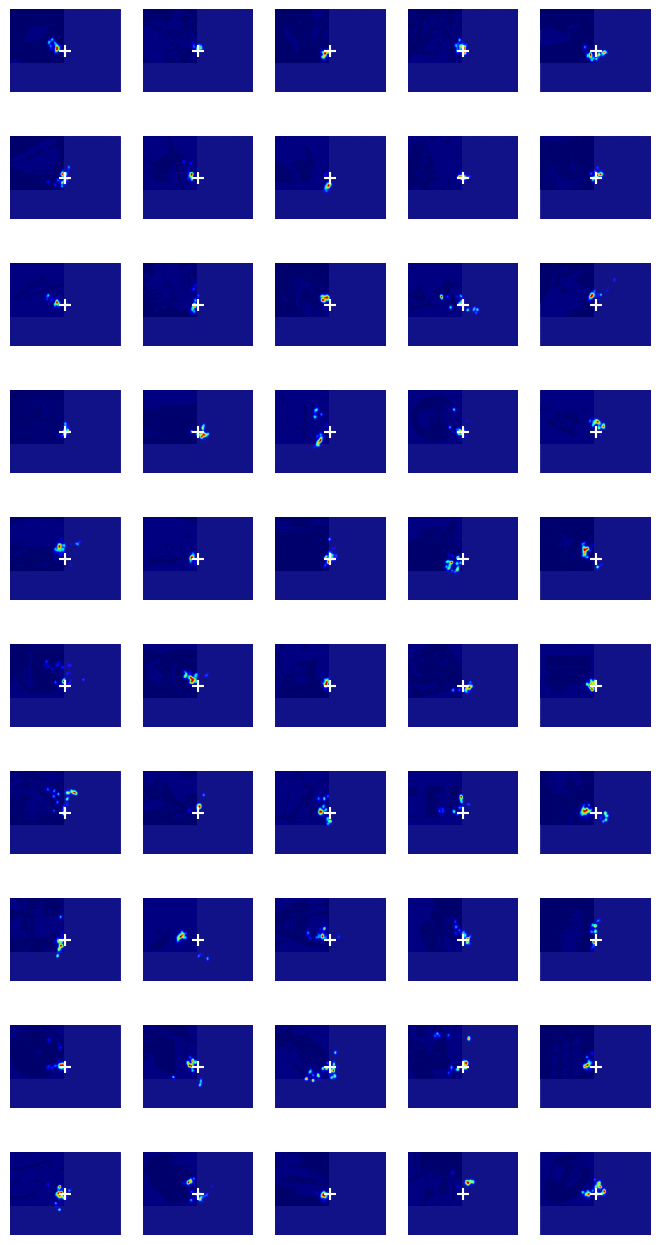

In [77]:
# fig = plt.figure(figsize=(8.27, 8.27*2), dpi=100)

# for i, image_label in enumerate(image_label_list):
#     data_tmp = dat_free.loc[(dat_free['stimulus_name'] == image_label)]

#     bin_size = 1
#     x = np.arange(0, 1024 // bin_size, 1) + 1
#     y = np.arange(0, 768 // bin_size, 1) + 1

#     x_mesh, y_mesh = np.meshgrid(x, y)
#     eye_pos_dense = np.zeros((768 // bin_size, 1024 // bin_size)) # Y axis dir: Up-to-down

#     for epx, epy in zip(np.round(data_tmp['pos_x']), np.round(data_tmp['pos_y'])):
#         if not 0 < epx < 1024: continue
#         if not 0 < epy < 768: continue
# #         eye_pos_dense[int(epy / bin_size) - 1, int(epx / bin_size) - 1] += 1
# #         print('epx, epy:',epx, epy)
# #         print('after:',int(768 - epy / bin_size) - 1, int(epx / bin_size) - 1)
#         eye_pos_dense[int(768 - epy / bin_size) - 1, int(epx / bin_size) - 1] += 1
    
#     eye_pos_dense = ndimage.gaussian_filter(eye_pos_dense, sigma=8)
#     original_image= image_label + '.JPEG'
# #     subplot_pos = fp_pos[0] / 3 + 3 + (- fp_pos[1] / 3 + 2) * 5
# #     subplot_pos = fp_pos[0] / 3 + 3 + (fp_pos[1] / 3 + 2) * 5
# #     original_image = original_img_path + image_label + '.JPEG'
    
#     original_image_path = os.path.join(im_path, original_image)
#     img = cv.imread(original_image_path,cv.IMREAD_UNCHANGED)
#     plt.subplot(10, 5, i+1)
#     plt.imshow(img)
#     plt.pcolormesh(x_mesh, y_mesh, eye_pos_dense, cmap='jet', alpha=0.05)
    
# #     plt.scatter(fp_pos[2], fp_pos[3], marker='+', s=64, c='white')
#     plt.scatter(1024//2, 768//2, marker='+', s=64, c='white')
# #     plt.title('image = (%s)' % (fp_pos[0], fp_pos[1]))
#     plt.axis('off')

# plt.savefig('./figures/HeatMap_freeviewing_YS210108.png')